In [1]:
import turicreate as tc
import tensorflow as tf
import numpy as np
from PIL import Image
import os
import pickle

2023-12-01 11:56:34.972614: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


pip install notebook==6.4.12

pip install Pillow==9.5.0


In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')]


In [5]:
# tc.config.set_num_gpus(-1)
tc.config.set_runtime_config("TURI_NUM_GPUS", 4)

## increase performance (lead to insufficient memory issue)
# tc.config.set_runtime_config("TURI_FILEIO_MAXIMUM_CACHE_CAPACITY", 2147483648 * 10) # N * 2 GB
# tc.config.set_runtime_config("TURI_FILEIO_MAXIMUM_CACHE_CAPACITY_PER_FILE", 2147483648 * 5) 
# tc.config.set_runtime_config("TURI_SFRAME_JOIN_BUFFER_NUM_CELLS", 52428800 * 5)
# tc.config.set_runtime_config("TURI_SFRAME_GROUPBY_BUFFER_NUM_ROWS", 1048576 * 5)
# tc.config.set_runtime_config("TURI_SFRAME_FILE_HANDLE_POOL_SIZE", 128 * 3)
# tc.config.set_runtime_config('TURI_DEFAULT_NUM_PYLAMBDA_WORKERS', 36)

In [6]:
# tc.config.get_runtime_config()

In [7]:
tc.config.get_num_gpus()

4

In [8]:
!pwd

/home/qiyuc/projects/origami_sensei/turicreate


In [4]:
def load_data(data_dir):
    label_path = os.path.join(data_dir, "labels.pkl")
    with open(label_path, "rb") as fin:
        label2ind = pickle.load(fin)
    # add to list of images & Labels
    images = []
    labels = []
    for label, indices in label2ind.items():
        labels += [str(label)] * len(indices)
        for ind in indices:
            img = tc.Image(os.path.join(data_dir, str(ind)+".png"))
            images.append(img)
        # labels.append(str(label))
        # images.append(tc.Image(os.path.join(data_dir, str(indices[0])+".png")))
    assert len(images) == len(labels)
    print(f"-- Load {len(images)} images from: {data_dir}")

    return tc.SFrame({"image":images, "label":labels})

# Test sample model for stop sign

In [9]:
data_dir = "data/stop_sign"

In [10]:
# Load the starter images
starter_images = tc.SFrame({'image':[tc.Image(f'{data_dir}/stop_sign_starter.png')],
                           'label':['stop_sign']})
test_images = tc.SFrame({'image':[tc.Image(f'{data_dir}/stop_sign_test1.jpg'), 
                                  tc.Image(f'{data_dir}/stop_sign_test2.jpg')]})

display(starter_images)
display(test_images)

image,label
Height: 497 Width: 500,stop_sign


image
Height: 1240 Width: 1402
Height: 800 Width: 800


In [21]:
# Create a model. This step will take a few hours on CPU and about an hour on GPU
model = tc.one_shot_object_detector.create(starter_images, 'label', max_iterations=100)

Augmenting input images using 951 background images.

+------------------+--------------+------------------+

| Images Augmented | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 100              | 11.69s       | 10.5%            |

| 200              | 16.39s       | 21%              |

| 300              | 23.57s       | 31.5%            |

| 400              | 29.87s       | 42%              |

| 500              | 35.49s       | 52.5%            |

| 600              | 40.34s       | 63%              |

| 700              | 45.53s       | 73.5%            |

| 800              | 50.83s       | 84%              |

| 900              | 56.86s       | 94.5%            |

+------------------+--------------+------------------+

Using 'image' as feature column
Using 'annotation' as annotations column


Using a GPU to create model.

Setting 'batch_size' to 32

+--------------+--------------+--------------+

| Iteration    | Loss         | Elapsed Time |

+--------------+--------------+--------------+

| 1            | 58.2151      | 5.67s        |

| 2            | 58.149       | 6.63s        |

| 3            | 58.045       | 7.59s        |

| 4            | 57.8799      | 8.54s        |

| 5            | 57.6241      | 9.47s        |

| 10           | 54.5544      | 14.81s       |

| 15           | 49.0473      | 19.95s       |

| 20           | 41.7565      | 24.91s       |

| 25           | 33.948       | 29.88s       |

| 30           | 26.7509      | 35.41s       |

| 35           | 20.5197      | 39.87s       |

| 40           | 15.4589      | 44.39s       |

| 45           | 11.7145      | 48.92s       |

| 50           | 8.84814      | 53.42s       |

| 55           | 6.80898      | 57.90s       |

| 60           | 5.40007      | 1m 2s        |

| 65           | 4.34062      | 1m 7s        |

| 70           | 3.63772      | 1m 12s       |

| 75           | 3.05878      | 1m 16s       |

| 80           | 2.69289      | 1m 20s       |

| 85           | 2.31087      | 1m 25s       |

| 90           | 2.08395      | 1m 30s       |

| 95           | 1.88106      | 1m 35s       |

| 100          | 1.67237      | 1m 39s       |

| 105          | 1.5397       | 1m 44s       |

| 110          | 1.40015      | 1m 48s       |

| 115          | 1.30381      | 1m 52s       |

| 120          | 1.22408      | 1m 58s       |

| 125          | 1.22514      | 2m 2s        |

| 130          | 1.15261      | 2m 7s        |

| 135          | 1.08335      | 2m 11s       |

| 140          | 1.11132      | 2m 15s       |

| 145          | 1.0688       | 2m 20s       |

| 150          | 1.03131      | 2m 25s       |

| 155          | 0.996029     | 2m 30s       |

| 160          | 1.01465      | 2m 34s       |

| 165          | 0.993819     | 2m 39s       |

| 170          | 0.96699      | 2m 43s       |

| 175          | 0.910432     | 2m 48s       |

| 180          | 0.90341      | 2m 53s       |

| 185          | 0.906585     | 2m 58s       |

| 190          | 0.853595     | 3m 2s        |

| 195          | 0.875738     | 3m 7s        |

| 200          | 0.837424     | 3m 12s       |

| 205          | 0.764025     | 3m 16s       |

| 210          | 0.75311      | 3m 21s       |

| 215          | 0.809347     | 3m 26s       |

| 220          | 0.790459     | 3m 30s       |

| 225          | 0.817655     | 3m 35s       |

| 230          | 0.762677     | 3m 39s       |

| 235          | 0.720034     | 3m 44s       |

| 240          | 0.70937      | 3m 49s       |

| 245          | 0.760705     | 3m 54s       |

| 250          | 0.751346     | 3m 58s       |

| 255          | 0.738043     | 4m 3s        |

| 260          | 0.736198     | 4m 7s        |

| 265          | 0.718345     | 4m 12s       |

| 270          | 0.708652     | 4m 17s       |

| 275          | 0.722534     | 4m 21s       |

| 280          | 0.740632     | 4m 26s       |

| 285          | 0.714997     | 4m 31s       |

| 290          | 0.721384     | 4m 35s       |

| 295          | 0.731455     | 4m 40s       |

| 300          | 0.666711     | 4m 45s       |

| 305          | 0.637146     | 4m 49s       |

| 310          | 0.651708     | 4m 54s       |

| 315          | 0.701219     | 4m 59s       |

| 320          | 0.64971      | 5m 3s        |

| 325          | 0.683686     | 5m 8s        |

| 330          | 0.661916     | 5m 13s       |

| 335          | 0.642051     | 5m 17s       |

| 340          | 0.64838      | 5m 22s       |

| 345          | 0.64187      | 5m 26s       |

| 350          | 0.659163     | 5m 31s       |

| 355          | 0.656268     | 5m 36s       |

| 360          | 0.691529     | 5m 41s       |

| 365          | 0.652575     | 5m 45s       |

| 370          | 0.650499     | 5m 50s       |

| 375          | 0.639402     | 5m 54s       |

| 380          | 0.588455     | 5m 59s       |

| 385          | 0.602505     | 6m 3s        |

| 390          | 0.627055     | 6m 9s        |

| 395          | 0.638753     | 6m 13s       |

| 400          | 0.654339     | 6m 18s       |

| 405          | 0.643066     | 6m 22s       |

| 410          | 0.652038     | 6m 27s       |

| 415          | 0.64147      | 6m 31s       |

| 420          | 0.634072     | 6m 36s       |

| 425          | 0.685254     | 6m 41s       |

| 430          | 0.694565     | 6m 45s       |

| 435          | 0.669211     | 6m 50s       |

| 440          | 0.665602     | 6m 54s       |

| 445          | 0.694491     | 6m 59s       |

| 450          | 0.687019     | 7m 4s        |

| 455          | 0.678972     | 7m 9s        |

| 460          | 0.691685     | 7m 13s       |

| 465          | 0.653881     | 7m 18s       |

| 470          | 0.623955     | 7m 22s       |

| 475          | 0.601628     | 7m 27s       |

| 480          | 0.626438     | 7m 32s       |

| 485          | 0.617139     | 7m 37s       |

| 490          | 0.624048     | 7m 41s       |

| 495          | 0.619653     | 7m 46s       |

| 500          | 0.643257     | 7m 49s       |

+--------------+--------------+--------------+

In [24]:
model = tc.one_shot_object_detector.create(starter_images, 'label', max_iterations=500)

Augmenting input images using 951 background images.

+------------------+--------------+------------------+

| Images Augmented | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 100              | 11.48s       | 10.5%            |

| 200              | 16.20s       | 21%              |

| 300              | 23.53s       | 31.5%            |

| 400              | 29.94s       | 42%              |

| 500              | 35.65s       | 52.5%            |

| 600              | 40.60s       | 63%              |

| 700              | 45.82s       | 73.5%            |

| 800              | 51.16s       | 84%              |

| 900              | 57.29s       | 94.5%            |

+------------------+--------------+------------------+

Using 'image' as feature column
Using 'annotation' as annotations column


Using a GPU to create model.

Setting 'batch_size' to 32

+--------------+--------------+--------------+

| Iteration    | Loss         | Elapsed Time |

+--------------+--------------+--------------+

| 1            | 57.9956      | 6.43s        |

| 2            | 57.9826      | 7.40s        |

| 3            | 57.8882      | 9.56s        |

| 4            | 57.6959      | 11.71s       |

| 5            | 57.4315      | 12.69s       |

| 10           | 54.5042      | 21.75s       |

| 15           | 48.9936      | 30.37s       |

ToolkitError: An error occurred: KeyboardInterrupt: 

At:
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/tensorflow/python/client/session.py(1454): _call_tf_sessionrun
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/tensorflow/python/client/session.py(1361): _run_fn
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/tensorflow/python/client/session.py(1397): _do_call
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/tensorflow/python/client/session.py(1371): _do_run
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/tensorflow/python/client/session.py(1191): _run
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/tensorflow/python/client/session.py(977): run
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/turicreate/toolkits/object_detector/_tf_image_augmenter.py(601): get_augmented_data
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/turicreate/extensions.py(290): __run_class_function
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/turicreate/extensions.py(305): <lambda>
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/turicreate/toolkits/object_detector/object_detector.py(297): create
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/turicreate/toolkits/one_shot_object_detector/one_shot_object_detector.py(73): create
  /tmp/ipykernel_7454/2803147569.py(1): <module>
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/IPython/core/interactiveshell.py(3508): run_code
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/IPython/core/interactiveshell.py(3448): run_ast_nodes
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/IPython/core/interactiveshell.py(3269): run_cell_async
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/IPython/core/async_helpers.py(129): _pseudo_sync_runner
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/IPython/core/interactiveshell.py(3064): _run_cell
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/IPython/core/interactiveshell.py(3009): run_cell
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/ipykernel/zmqshell.py(546): run_cell
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/ipykernel/ipkernel.py(422): do_execute
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/ipykernel/kernelbase.py(740): execute_request
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/ipykernel/kernelbase.py(412): dispatch_shell
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/ipykernel/kernelbase.py(505): process_one
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/ipykernel/kernelbase.py(516): dispatch_queue
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/asyncio/events.py(81): _run
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/asyncio/base_events.py(1859): _run_once
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/asyncio/base_events.py(570): run_forever
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/tornado/platform/asyncio.py(195): start
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/ipykernel/kernelapp.py(736): start
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/traitlets/config/application.py(992): launch_instance
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/site-packages/ipykernel_launcher.py(17): <module>
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/runpy.py(87): _run_code
  /home/qiyuc/anaconda3/envs/turicreate/lib/python3.8/runpy.py(194): _run_module_as_main


In [22]:
# Save the model for later use in TuriCreate
model.save('stop-sign.model')

# # Export for use in Core ML
model.export_coreml('MyCustomOneShotDetector.mlmodel')

## visualize

In [13]:
model = tc.load_model('outputs/stop_sign/stop-sign.model')
model

Class                                    : OneShotObjectDetector

Model summary
-------------
Number of classes                        : 1
Input image shape                        : [3, 416, 416]

Synthetic data summary
----------------------
Number of synthetically generated examples : 951
Number of synthetically generated bounding boxes : 951

Training summary
----------------
Training time                            : 9m 44s
Training iterations                      : 500
Training epochs                          : 16
Final loss (specific to model)           : 0.6472

In [15]:
# Save predictions on the test set
test_images['predictions'] = model.predict(test_images)

# Draw prediction bounding boxes on the test images
test_images['annotated_predictions'] = \
    tc.one_shot_object_detector.util.draw_bounding_boxes(test_images['image'], test_images['predictions']) 

In [16]:
test_images['predictions']

dtype: list
Rows: 2
[[{'label': 'stop_sign', 'type': 'rectangle', 'coordinates': {'x': 828.3675573468208, 'y': 939.1943833231926, 'width': 176.94412231445312, 'height': 178.08070373535156}, 'confidence': 0.6415411829948425}, {'label': 'stop_sign', 'type': 'rectangle', 'coordinates': {'x': 1315.1920376345515, 'y': 1081.3320018351078, 'width': 98.62127685546875, 'height': 111.3069076538086}, 'confidence': 0.526159405708313}], [{'label': 'stop_sign', 'type': 'rectangle', 'coordinates': {'x': 349.3985652923584, 'y': 464.58247900009155, 'width': 238.40798950195312, 'height': 277.45263671875}, 'confidence': 0.5268906950950623}, {'label': 'stop_sign', 'type': 'rectangle', 'coordinates': {'x': 339.2845153808594, 'y': 461.38997077941895, 'width': 462.3497619628906, 'height': 509.30584716796875}, 'confidence': 0.29514819383621216}, {'label': 'stop_sign', 'type': 'rectangle', 'coordinates': {'x': 347.69760966300964, 'y': 467.5567090511322, 'width': 154.57723999023438, 'height': 178.83880615234375

[{'label': 'stop_sign',
  'type': 'rectangle',
  'coordinates': {'x': 349.3985652923584,
   'y': 464.58247900009155,
   'width': 238.40798950195312,
   'height': 277.45263671875},
  'confidence': 0.5268906950950623},
 {'label': 'stop_sign',
  'type': 'rectangle',
  'coordinates': {'x': 339.2845153808594,
   'y': 461.38997077941895,
   'width': 462.3497619628906,
   'height': 509.30584716796875},
  'confidence': 0.29514819383621216},
 {'label': 'stop_sign',
  'type': 'rectangle',
  'coordinates': {'x': 347.69760966300964,
   'y': 467.5567090511322,
   'width': 154.57723999023438,
   'height': 178.83880615234375},
  'confidence': 0.29230716824531555}]

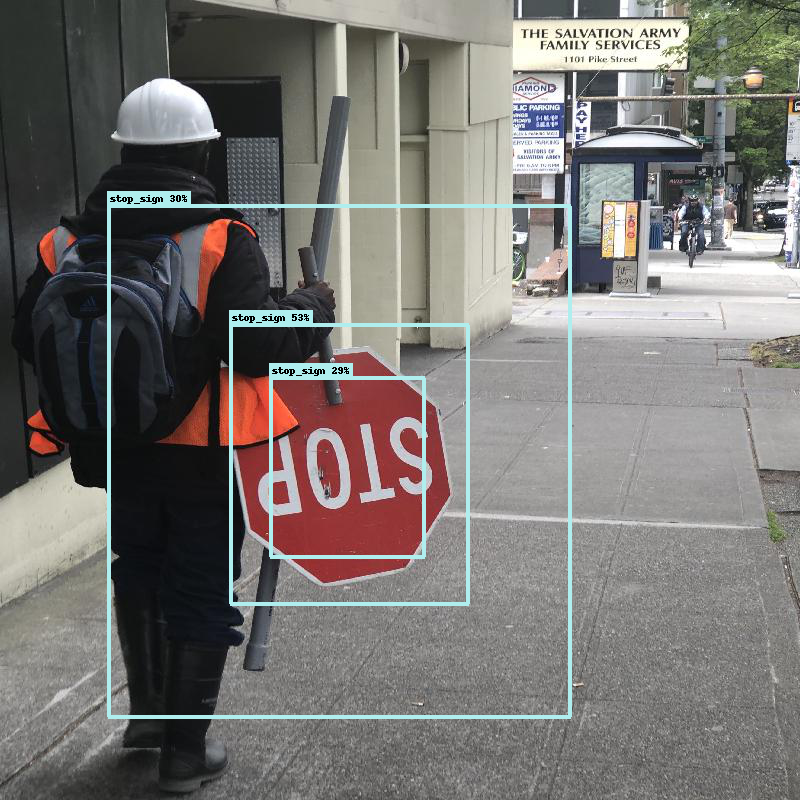

In [20]:
ind = 1
display(test_images['predictions'][ind])
display(test_images['annotated_predictions'][ind])

## check synthetic image

In [19]:
# visualize
synthetic_images = tc.one_shot_object_detector.util.preview_synthetic_training_data(starter_images, 'label')

# synthetic_images.explore()

Augmenting input images using 951 background images.

+------------------+--------------+------------------+

| Images Augmented | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 100              | 11.33s       | 10.5%            |

| 200              | 15.93s       | 21%              |

| 300              | 23.06s       | 31.5%            |

| 400              | 29.31s       | 42%              |

| 500              | 34.92s       | 52.5%            |

| 600              | 39.77s       | 63%              |

| 700              | 44.94s       | 73.5%            |

| 800              | 50.21s       | 84%              |

| 900              | 56.20s       | 94.5%            |

+------------------+--------------+------------------+

In [20]:
synthetic_images

image,annotation
Height: 229 Width: 408,"{'coordinates': {'x':248.43020629882812, 'y': ..."
Height: 128 Width: 119,"{'coordinates': {'x':249.97096252441406, 'y': ..."
Height: 281 Width: 375,"{'coordinates': {'x':249.98348999023438, 'y': ..."
Height: 234 Width: 312,"{'coordinates': {'x':249.99082946777344, 'y': ..."
Height: 293 Width: 391,"{'coordinates': {'x':249.98255920410156, 'y': ..."
Height: 356 Width: 536,"{'coordinates': {'x':250.12564086914062, 'y': ..."
Height: 234 Width: 312,"{'coordinates': {'x':250.1322021484375, 'y': ..."
Height: 265 Width: 413,"{'coordinates': {'x':249.87026977539062, 'y': ..."
Height: 244 Width: 367,"{'coordinates': {'x':249.75375366210938, 'y': ..."
Height: 500 Width: 750,"{'coordinates': {'x':251.1177978515625, 'y': ..."


{'coordinates': {'x': 250.37713623046875,
  'y': 248.373779296875,
  'width': 38.58406066894531,
  'height': 41.90034484863281},
 'label': 'stop_sign'}

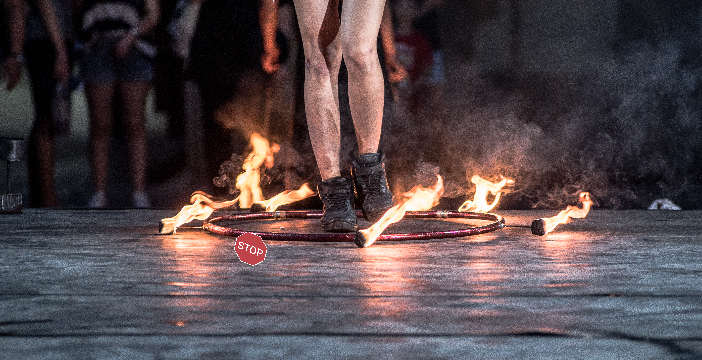

In [50]:
ind = 10
display(synthetic_images["annotation"][ind])
display(synthetic_images["image"][ind])

In [47]:
np.asarray(synthetic_images["image"][ind])

array(Height: 356px
Width: 536px
Channels: 3
, dtype=object)

# homog_data

In [27]:
data_dir = "../data/dog_p_on_g_anno_homog_cropped/train"
label_path = os.path.join(data_dir, "labels.pkl")
with open(label_path, "rb") as fin:
    label2ind = pickle.load(fin)
# add to list of images & Labels
images = []
labels = []
for label, indices in label2ind.items():
    labels += [label] * len(indices)
    for ind in indices:
        img = tc.Image(os.path.join(data_dir, str(ind)+".png"))
        images.append(img)
assert len(images) == len(labels)
print(f"-- Load {len(images)} images from: {data_dir}")

-- Load 77 images from: ../data/dog_p_on_g_anno_homog_cropped/train


In [1]:
# train_dataset = tc.SFrame({"image":images, "label":labels})

# # train a model
# model = tc.one_shot_object_detector.create(train_dataset, 'label') # , max_iterations=2000

In [29]:
train_dataset

image,label
Height: 238 Width: 273,0
Height: 367 Width: 355,0
Height: 280 Width: 701,0
Height: 258 Width: 252,0
Height: 265 Width: 248,0
Height: 335 Width: 101,0
Height: 726 Width: 387,0
Height: 720 Width: 271,0
Height: 350 Width: 189,0
Height: 263 Width: 340,0


# Evaluate trained model

In [3]:
model_dir = "output/dog_p_on_g_anno_homog_cropped_train4/one_shot_object_detector.model"
model = tc.load_model(model_dir)
model

Class                                    : OneShotObjectDetector

Model summary
-------------
Number of classes                        : 9
Input image shape                        : [3, 416, 416]

Synthetic data summary
----------------------
Number of synthetically generated examples : 38040
Number of synthetically generated bounding boxes : 38040

Training summary
----------------
Training time                            : 2h 32m
Training iterations                      : 10000
Training epochs                          : 8
Final loss (specific to model)           : 0.9322

In [12]:
# test_dataset = load_data(data_dir)
data_dir = "../data/dog_p_on_g_anno_homog"
test_label2ind_path = "../data/dog_p_on_g_anno_homog_cropped/labels.pkl"
with open(test_label2ind_path, "rb") as fin:
    test_label2ind = pickle.load(fin)

# add to list of images & Labels
images = []
labels = []
all_indices = []
for label, indices in test_label2ind.items():
    labels += [str(label)] * len(indices)
    all_indices += indices
    for ind in indices:
        img = tc.Image(os.path.join(data_dir, str(ind)+".jpg"))
        images.append(img)
assert len(images) == len(labels)
print(f"-- Load {len(images)} images from: {data_dir}")

-- Load 285 images from: ../data/dog_p_on_g_anno_homog


image,label
Height: 800 Width: 1200,0
Height: 800 Width: 1200,0
Height: 800 Width: 1200,0
Height: 800 Width: 1200,0
Height: 800 Width: 1200,0
Height: 800 Width: 1200,0
Height: 800 Width: 1200,0
Height: 800 Width: 1200,0
Height: 800 Width: 1200,0
Height: 800 Width: 1200,0


In [ ]:
test_dataset = tc.SFrame({"image":images, "label":labels})

# test_label2ind
test_dataset

In [19]:
# Save predictions on the test set
test_dataset['predictions'] = model.predict(test_dataset)

# Draw prediction bounding boxes on the test images
test_dataset['annotated_predictions'] = \
    tc.one_shot_object_detector.util.draw_bounding_boxes(test_dataset['image'], test_dataset['predictions']) 

There are 2 images for label: 8


[{'label': '3',
  'type': 'rectangle',
  'coordinates': {'x': 520.5161333084106,
   'y': 440.2294635772705,
   'width': 675.3062133789062,
   'height': 506.12286376953125},
  'confidence': 0.3100806474685669},
 {'label': '6',
  'type': 'rectangle',
  'coordinates': {'x': 532.2660326957703,
   'y': 400.2096176147461,
   'width': 564.1813354492188,
   'height': 486.92413330078125},
  'confidence': 0.3593924939632416}]

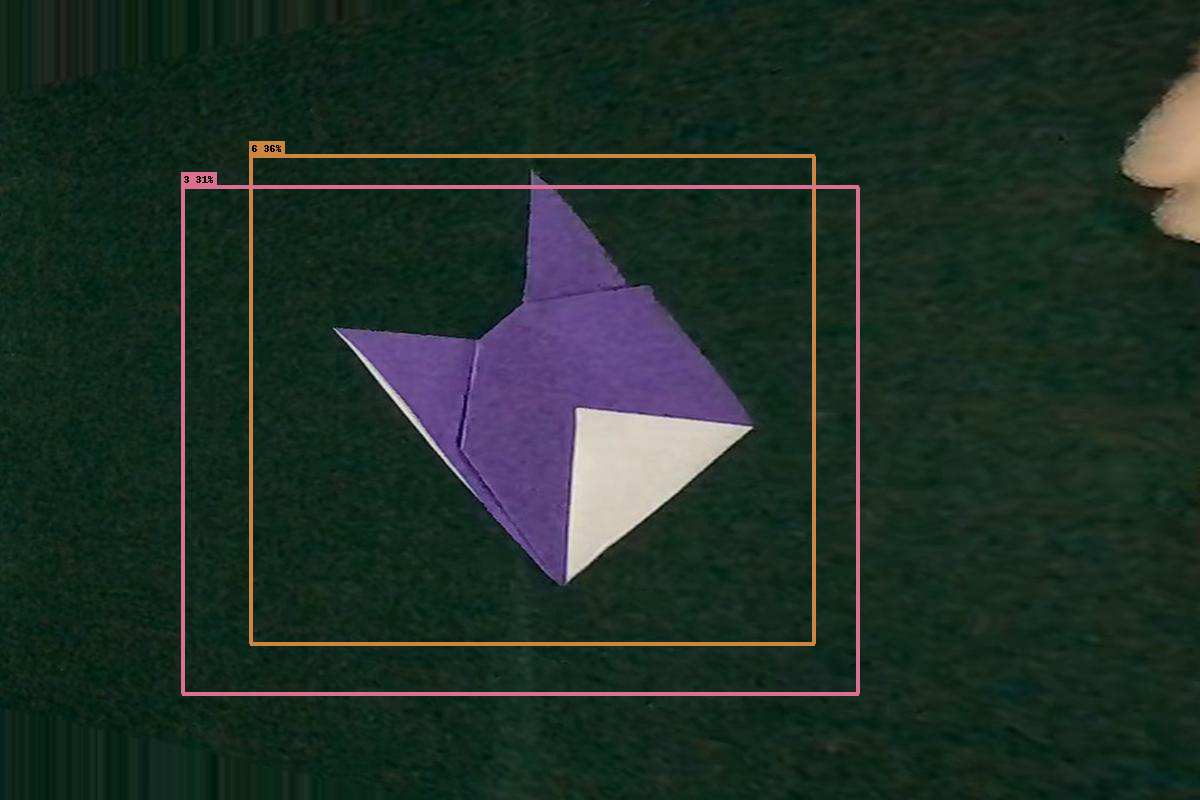

In [30]:
label = 8
ind = 0

print(f"There are {len(test_label2ind[label])} images for label: {label}")
img_ind = test_label2ind[label][ind]
all_indices_ind = all_indices.index(img_ind)
display(test_dataset['predictions'][all_indices_ind])
display(test_dataset['annotated_predictions'][all_indices_ind])

In [14]:
test_label2ind[label][ind]

72

In [18]:
test_dataset

image,label
Height: 800 Width: 1200,0
Height: 800 Width: 1200,0
Height: 800 Width: 1200,0
Height: 800 Width: 1200,0
Height: 800 Width: 1200,0
Height: 800 Width: 1200,0
Height: 800 Width: 1200,0
Height: 800 Width: 1200,0
Height: 800 Width: 1200,0
Height: 800 Width: 1200,0
